<a href="https://colab.research.google.com/github/ramirezvillanadialidia-byte/EDPII/blob/main/Extraordinario_22_de_enero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SE RESUELVE EL PROBLEMA:
  $-u'' = 1 - x^2$ para $ 0 < x < 1$  con condiciones de frontera en: $u(0) = u(1) = 0$

Lo primero que se hizo fue calcular la solución exacta, mediante integrales

In [20]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos la variable simbólica y la función fuente f(x)
x = sp.Symbol('x')
f_x = 1 - x**2

# SOLUCIÓN EXACTA
# Integramos dos veces para resolver u'' = -(1 - x^2), aquí multiplicamos por -1
#toda la expresión, para llevarla a la forma estándar del MEF.

u_exacta_expr = sp.integrate(sp.integrate(-(1 - x**2), x), x)

# Definimos constantes de integración para condiciones de frontera u(0)=0, u(1)=0
c1, c2 = sp.symbols('c1 c2')
u_exacta_expr += c1*x + c2

# Resolvemos el sistema para hallar c1 y c2
sol_const = sp.solve([u_exacta_expr.subs(x, 0), u_exacta_expr.subs(x, 1)], [c1, c2])
u_exacta_final = u_exacta_expr.subs(sol_const)

print("Los valores de las constantes son:")


print(f"c1 = {sol_const[c1]}")
print(f"c2 = {sol_const[c2]}")

print("Por lo tanto la solución exacta es:")
print(u_exacta_final)

Los valores de las constantes son:
c1 = 5/12
c2 = 0
Por lo tanto la solución exacta es:
x**4/12 - x**2/2 + 5*x/12


Después, realizamos nuestra matriz global, que surge del ensamblaje de las matrices locales por elemento, es decir
$$k^e = \frac{1}{h} \begin{pmatrix} 1 & -1 \\ -1 & 1 \end{pmatrix} $$


ya que el tamaño del paso es:
$$ h = \frac{1 - 0}{4} = 0.25 $$

Sustituyendo el valor de $h$ en la fórmula de la matriz local
$$\frac{1}{h} = \frac{1}{0.25} = 4 $$

Por lo tanto, la matriz de rigidez local para cada uno de los elementos de la barra es:
$$ k^e = \begin{pmatrix} 4 & -4 \\ -4 & 4 \end{pmatrix} $$

ya que tenemos tres elementos, es decir, tres nodos internos, nos quedan tres matrices iguales, que hay que ensamblar. pero no sabia como hacerlo aqui, asi que lo copie de mi cuaderno, que es lo que se ve en el codigo.

posteriormente, clculamos el vector de cargas, para no revolverme con tanto codigo, lo que hice fue aplicar la regla de trapecio para dar una aproximacion, lo unico que hice fue simplificar, o despejar la formula para el vector de cargas, es decir

aproximamos el vector de carga $F$ concentrando la función fuente $f(x) = 1 - x^2$ directamente en los nodos.

La definición exacta de un componente del vector de carga en el nodo $x_i$ es la integral del producto de la carga por la función sombrero $\phi_i(x)$:
$$ F_i = \int_{x_{i-1}}^{x_{i+1}} f(x) \phi_i(x) \, dx $$


Dado que el paso de malla $h = 0.25$ es pequeño, podemos decir que la función $f(x)$ varía muy poco en el soporte del nodo. Por lo tanto, aproximamos $f(x)$ como una constante igual al valor de la función evaluada en el nodo central:
$$ f(x) \approx f(x_i) $$

Entinces  podemos extraerla del integrando:
$$ F_i \approx f(x_i) \int_{x_{i-1}}^{x_{i+1}} \phi_i(x) \, dx $$


La integral $\int \phi_i(x) \, dx$ representa el área bajo la curva de la función sombrero. Geométricamente, esta función es un triángulo con un area

$$\text{Área} = \frac{\text{base} \times \text{altura}}{2} = \frac{2h \times 1}{2} = h $$

y asi finalmenete nos queda
$$ F_i \approx f(x_i) \cdot h $$

Para el caso de este problema con $h = 0.25$, el vector se calcula simplemente evaluando:
$$F_i \approx (1 - x_i^2) \cdot 0.25 $$


In [21]:
import numpy as np

h=(1-0)/4

# MATRIZ DE RIGIDEZ GLOBAL (K)
#Aquí la copie del cuaderno, ya que no tenía ni idea, de como ensamblarla aquí.
K = np.array([
    [ 8, -4,  0],
    [-4,  8, -4],
    [ 0, -4,  8]
])

print("la matriz global es:")
print(K)

# VECTOR DE CARGA GLOBAL (F)

def f(x):
    return 1-x**2
    print("f(x) = 1-x^2")

# Nodos internos donde calculamos: x2=0.25, x3=0.50, x4=0.75

x_nodos = np.array([0.25, 0.50, 0.75])
print("estos son los nodos internos")
print(x_nodos)
# Calculamos F_i ≈ f(x_i) * h, aquí hacemos esto porque,  h=0.25, es pequeño
#y nos deja ver que no cambia, entonces podemos tratar a f(xi) como constante
#y la sacamos de la integral, separamos la fórmula, por así decirlo, como nos queda  la
#funcion sombrero y esta tiene forma de triangulo chiquito, podemos simplificar aún más


F = np.array([f(xi) * h for xi in x_nodos])

print("Estos son los valores en el vector F, aplicando la aproximación")
print(F)


# 4. RESOLVER EL SISTEMA K * U = F
# Queremos encontrar los valores de u en los nodos internos

U_internos = np.linalg.solve(K, F)

# 5. RESULTADOS
print(f"Resultados en los nodos internos, la solucion FEM, haciendo K*U=F:")
print(f"u(0.25) = {U_internos[0]:.6f}")
print(f"u(0.50) = {U_internos[1]:.6f}")
print(f"u(0.75) = {U_internos[2]:.6f}")

la matriz global es:
[[ 8 -4  0]
 [-4  8 -4]
 [ 0 -4  8]]
estos son los nodos internos
[0.25 0.5  0.75]
Estos son los valores en el vector F, aplicando la aproximación
[0.234375 0.1875   0.109375]
Resultados en los nodos internos, la solucion FEM, haciendo K*U=F:
u(0.25) = 0.074219
u(0.50) = 0.089844
u(0.75) = 0.058594


por ùltimo, se calculan los valores de la solucion exacta en los nodos, y se comparan resultados, para poder ver nuestro error, que tan grande puede ser, es lo que se muestra a continuación.

In [22]:

nodos = [0.25, 0.5, 0.75]

print("Valores de la solución exacta:")

u_exacta_nodos= []


for n in nodos:
    # Sustituimos el nodo en la solución exacta
    resultado = u_exacta_final.subs(x, n)

    # Lo convertimos a número decimal
    valor_decimal = float(resultado)

    # Lo guardamos en la lista
    u_exacta_nodos.append(valor_decimal)

    print(f"En x = {n}, u = {valor_decimal:.6f}")

# Lo convertimos a un arreglo de numpy para poder restarlo con la solución FEM
u_exacta_nodos = np.array(u_exacta_nodos)

Valores de la solución exacta:
En x = 0.25, u = 0.073242
En x = 0.5, u = 0.088542
En x = 0.75, u = 0.057617


In [23]:
# Calculamos la diferencia absoluta entre la solución FEM y la exacta
error = np.abs(U_internos - u_exacta_nodos)

print("El error en los nodos es:")
print(np.round(error, 6))



El error en los nodos es:
[0.000977 0.001302 0.000977]


por último, se dibuja la grafica, comoarando ambas soluciones, la soluiócn exacta y la solucion FEM

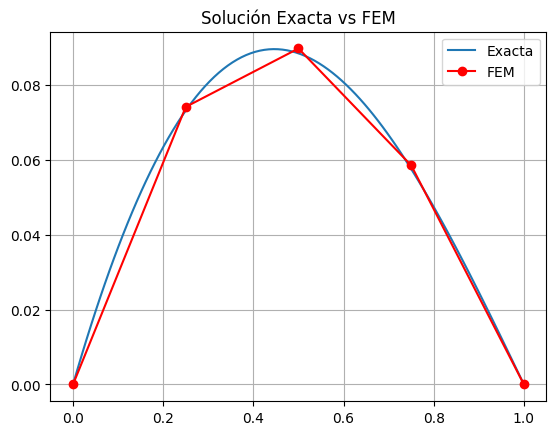

In [24]:
# Graficamos los resultados
plt.plot(x_curva, u_curva, label='Exacta') # Línea de la solución exacta
plt.plot(x_fem, u_fem, 'ro-', label='FEM') # Puntos y líneas del método FEM
plt.legend()
plt.title('Solución Exacta vs FEM')
plt.grid()
plt.show()
